# Data Exploration

## Loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
names = ['age', 'workclass', 'education', 'marital-status', 'occupation', 'race', 'sex', 'hours-per-week', 'native-country','income']
data = pd.read_csv('adult_train.csv', usecols=[0,1,3,5,6,8,9,12,13,14], names=names)
#data = pd.read_csv('adult.test.csv', usecols=[0,1,3,5,6,8,9,12,13,14], names=names)

In [3]:
print("Fields are",list(data))

Fields are ['age', 'workclass', 'education', 'marital-status', 'occupation', 'race', 'sex', 'hours-per-week', 'native-country', 'income']


In [4]:
no_rows = len(data.index)
print('Number of data points is',no_rows)

Number of data points is 32561


In [5]:
dct = {func.__name__:data.apply(func) for func in (pd.Series.nunique, pd.Series.count)}
print(pd.concat(dct, axis=1))

                count  nunique
age             32561       73
workclass       32561        9
education       32561       16
marital-status  32561        7
occupation      32561       15
race            32561        5
sex             32561        2
hours-per-week  32561       94
native-country  32561       42
income          32561        2


## Distributions and Binning

| | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 |
|:---|:---|:---|:---|:---|:---|:---|:---|:---|
| **Income** | <=50K | >50K | | | | | | |
| **Sex** | Male | Female | | | | | | |
| **Native Country** | US | Other | | | | | | |
| **Race** | White | Asian-Pac-Islander | Amer-Indian-Eskimo | Other | Black | | | |
| **Occupation** | Exec-managerial | Craft-repair | Other-service | Prof-specialty | Armed-Forces | Sales | | |
|  | Adm-clerical | Handlers-cleaners | Tech-support |  |  | | | |
|  |  | Machine-op-inspct | Priv-house-serv |  |  | | | |
|  |  | Farming-fishing | Protective-serv |  |  | | | |
|  |  | Transport-moving | |  |  | | | |
| **Hours per Week** | 0-15 |16-25 |26-35 | 35-45 | 46-55 |55-99 | | |
| **Education** | Preschool | 9th | Bachelors | Master | Prof-school | Doctorate | | |
|  | 1st-4th | 10th | Some-college |  | |  | | |
|  | 5th-6th | 11th |  |  | |  | | |
|  | 7th-8th | 12th |  |  | |  | | |
|  |  | HS-grad |  |  | |  | | |
|  |  | Assoc-acdm |  |  | |  | | |
|  |  | Assoc-voc |  |  | |  | | |
| **Martial Status** | Married-civ-spouse | Divorced | Never-married | Separated | Widowed | Married-spouse-absent | Married-AF-spouse | |
| **Workclass** | Private | Self-emp-not-inc |Self-emp-inc | Federal-gov | Local-gov |State-gov |Without-pay | Never-worked|
| **Age** | 0-20 | 21-30 | 31-40 | 41-50 | 51-60 | 61-70 | 71-80 | 81-90 |

### Age distribution

In [ ]:
# Age before binning
f, ax = plt.subplots(1,2,figsize=(16,6))
data['age'].plot(kind='hist', bins=len(data['age'].value_counts()), title='Age distribution before binning', ax=ax[0])

# Bin
# 0-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90]
group_names = [0,1,2,3,4,5,6,7]
categories = pd.cut(data['age'], bins, labels=group_names)
data['age'] = pd.cut(data['age'], bins, labels=group_names)
# data['age']=data['age'].astype(float)
data['age'] = pd.to_numeric(data['age'], errors='coerce')

# save deleted rows in new dataframe
del_data = data[data['age'].isnull()]

data = data[~((data['age'].isnull()))]

# Age after binning
data['age'].plot(kind='hist', bins=len(data['age'].value_counts()), title='Age distribution after binning', ax=ax[1])
plt.show()

In [ ]:
print('Deleted',no_rows-len(data.index),'rows')
no_rows = len(data.index)

### Workhour distribution

In [ ]:
# HpW before binning
f, ax = plt.subplots(1,2,figsize=(16,6))
data['hours-per-week'].plot(kind='hist', bins=len(data['hours-per-week'].value_counts()), title='HpW distribution before binning', ax=ax[0])

# Bin
# 0-15,16-25,26-35,35-45,46-55,55-99 
bins = [0, 15, 25, 35, 45, 55, 99]
group_names = [0,1,2,3,4,5]
categories = pd.cut(data['hours-per-week'], bins, labels=group_names)
data['hours-per-week'] = pd.cut(data['hours-per-week'], bins, labels=group_names)
data['hours-per-week'] = pd.to_numeric(data['hours-per-week'], errors='coerce')

del_data['hours-per-week'] = pd.cut(del_data['hours-per-week'], bins, labels=group_names)
del_data['hours-per-week'] = pd.to_numeric(del_data['hours-per-week'], errors='coerce')

# save deleted rows in new dataframe
del_data = del_data.append(data[data['hours-per-week'].isnull()])

data = data[~((data['hours-per-week'].isnull()))]

# Age after binning
data['hours-per-week'].plot(kind='hist', bins=len(data['hours-per-week'].value_counts()), title='HpW distribution after binning', ax=ax[1])
plt.show()

In [ ]:
print('Deleted',no_rows-len(data.index),'rows')
no_rows = len(data.index)

### Gender distribution

In [ ]:
plt.figure(figsize=(6,6))
data['sex'].value_counts().plot(kind='pie',title='Sex distribution')

sex_dict = {" Male":0 , " Female":1}
data['sex'] = data['sex'].replace(sex_dict)
data['sex'] = pd.to_numeric(data['sex'], errors='coerce')

del_data['sex'] = del_data['sex'].replace(sex_dict)
del_data['sex'] = pd.to_numeric(del_data['sex'], errors='coerce')

# save deleted rows in new dataframe
del_data = del_data.append(data[data['sex'].isnull()])
data = data[~((data['sex'].isnull()))]

plt.show()

In [ ]:
print('Deleted',no_rows-len(data.index),'rows')
no_rows = len(data.index)

### Workclass distribution

In [ ]:
plt.figure(figsize=(6,6))
data['workclass'].value_counts().plot(kind='pie',title='Workclass distribution')

# Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked
workclass_dict = {" Private":0 , " Self-emp-not-inc":1, " Self-emp-inc":2, " Federal-gov":3,
                  " Local-gov":4," State-gov":5," Without-pay":6," Never-worked":7}
data['workclass'] = data['workclass'].replace(workclass_dict)
data['workclass'] = pd.to_numeric(data['workclass'], errors='coerce')

del_data['workclass'] = del_data['workclass'].replace(workclass_dict)
del_data['workclass'] = pd.to_numeric(del_data['workclass'], errors='coerce')
# save deleted rows in new dataframe
del_data = del_data.append(data[data['workclass'].isnull()])
data = data[~((data['workclass'].isnull()))]

plt.show()

In [ ]:
print('Deleted',no_rows-len(data.index),'rows')
no_rows = len(data.index)

### Marital status distribution

In [16]:
plt.figure(figsize=(6,6))
data['marital-status'].value_counts().plot(kind='pie', title='Marital status distribution')

# Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse
mar_dict = {" Married-civ-spouse":0 , " Divorced":1, " Never-married":2, " Separated":3,
            " Widowed":4, " Married-spouse-absent":5," Married-AF-spouse":6}
data['marital-status'] = data['marital-status'].replace(mar_dict)
data['marital-status'] = pd.to_numeric(data['marital-status'], errors='coerce')

del_data['marital-status'] = del_data['marital-status'].replace(mar_dict)
del_data['marital-status'] = pd.to_numeric(del_data['marital-status'], errors='coerce')
# save deleted rows in new dataframe
del_data = del_data.append(data[data['marital-status'].isnull()])

data = data[~((data['marital-status'].isnull()))]

plt.show()

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [ ]:
print('Deleted',no_rows-len(data.index),'rows')
no_rows = len(data.index)

### Race distribution

In [ ]:
plt.figure(figsize=(6,6))
data['race'].value_counts().plot(kind='pie', title='Race distribution')

# White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black
race_dict = {" White":0 , " Asian-Pac-Islander":1," Amer-Indian-Eskimo":2," Other":3," Black":4}
data['race'] = data['race'].replace(race_dict)
data['race'] = pd.to_numeric(data['race'], errors='coerce')
del_data['race'] = del_data['race'].replace(race_dict)
del_data['race'] = pd.to_numeric(del_data['race'], errors='coerce')
# save deleted rows in new dataframe
del_data = del_data.append(data[data['race'].isnull()])
data = data[~((data['race'].isnull()))]

plt.show()

In [ ]:
print('Deleted',no_rows-len(data.index),'rows')
no_rows = len(data.index)

### Education

In [ ]:
# Education before binning
f, ax = plt.subplots(2,2,figsize=(16,14))
data['education'].value_counts().plot(kind='pie', title='Education distribution before binning', ax=ax[0,0])
f.delaxes(ax[0,1])
data['education'].value_counts().plot(kind='bar', position=0,title='Education distribution before binning', ax=ax[1,0])

# Education: Preschool - 8th, 9th-12th & HS-grad & assoc, Bachelors & some-college, Master, Prof-school, Doctorate
edu_dict = {" Bachelors":2 , " Some-college":2 , " 11th":1 , " HS-grad":1 , " Prof-school":4 ,
            " Assoc-acdm":1 , " Assoc-voc":1 , " 9th":1 , " 7th-8th":0 , " 12th":1 , " Masters":3 ,
            " 1st-4th":0 , " 10th":1 , " Doctorate":5 , " 5th-6th":0 , " Preschool":0 }
data['education'] = data['education'].replace(edu_dict)
data['education'] = pd.to_numeric(data['education'], errors='coerce')
del_data['education'] = del_data['education'].replace(edu_dict)
del_data['education'] = pd.to_numeric(del_data['education'], errors='coerce')
# save deleted rows in new dataframe
del_data = del_data.append(data[data['education'].isnull()])
data = data[~((data['education'].isnull()))]

data['education'].value_counts().plot(kind='bar', position=0,title='Education distribution after binning', ax=ax[1,1])

plt.show()

In [ ]:
print('Deleted',no_rows-len(data.index),'rows')
no_rows = len(data.index)

### Native countries

In [ ]:
# Country before binning
f, ax = plt.subplots(2,2,figsize=(16,14))
data['native-country'].value_counts().plot(kind='pie', title='Native country distribution before binning', ax=ax[0,0])
f.delaxes(ax[0,1])
data['native-country'].value_counts().plot(kind='bar', position=0,title='Native country distribution before binning', ax=ax[1,0])

## Northamerica 0
# United-States, Outlying-US(Guam-USVI-etc), Canada

## Asia 1
# Cambodia, Thailand, Philippines, India, Japan,
# Taiwan, Laos, Iran, Vietnam, Hong, China

## Europe 2
# England, Germany, Yugoslavia, Hungary, Scotland,
# Portugal, Ireland, France, Italy, Poland, Greece,
# Holand-Netherlands

## Latin & Southamerica 3
# Puerto-Rico, Mexico, Dominican-Republic, Jamaica,
# Guatemala, Nicaragua, Haiti, Honduras, Cuba,
# Columbia, Ecuador, El-Salvador, Trinadad&Tobago,
# Peru, 

## Delete ?
# South 
# country_dict = {"United-States":0 , "Cambodia":1 , "England":2 , "Puerto-Rico":3 , "Canada":0 ,
#                 "Germany":2 , "Outlying-US(Guam-USVI-etc)":0 , "India":1 , "Japan":1 , "Greece":2 ,
#                 "South":'?' , "China":1 , "Cuba":3 , "Iran":1 , "Honduras":3 , "Philippines":1 ,
#                 "Italy":2 , "Poland":2 , "Jamaica":3 , "Vietnam":1 , "Mexico":3 , "Portugal":2 ,
#                 "Ireland":2 , "France":2 , "Dominican-Republic":3 , "Laos":1 , "Ecuador":3 ,
#                 "Taiwan":1 , "Haiti":3 , "Columbia":3 , "Hungary":2 , "Guatemala":3 ,
#                 "Nicaragua":3 , "Scotland":2 , "Thailand":1 , "Yugoslavia":2 , "El-Salvador":3 ,
#                 "Trinadad&Tobago":3 , "Peru":3 , "Hong":1 , "Holand-Netherlands":2}
country_dict = {" United-States":0 , " Cambodia":1 , " England":1 , " Puerto-Rico":1 , " Canada":1 ,
                " Germany":1 , " Outlying-US(Guam-USVI-etc)":1 , " India":1 , " Japan":1 , " Greece":1 ,
                " South":1 , " China":1 , " Cuba":1 , " Iran":1 , " Honduras":1 , " Philippines":1 ,
                " Italy":1 , " Poland":1 , " Jamaica":1 , " Vietnam":1 , " Mexico":1 , " Portugal":1 ,
                " Ireland":1 , " France":1 , " Dominican-Republic":1 , " Laos":1 , " Ecuador":1 ,
                " Taiwan":1 , " Haiti":1 , " Columbia":1 , " Hungary":1 , " Guatemala":1 ,
                " Nicaragua":1 , " Scotland":1 , " Thailand":1 , " Yugoslavia":1 , " El-Salvador":1 ,
                " Trinadad&Tobago":1 , " Peru":1 , " Hong":1 , " Holand-Netherlands":1}
data['native-country'] = data['native-country'].replace(country_dict)
data['native-country'] = pd.to_numeric(data['native-country'], errors='coerce')
del_data['native-country'] = del_data['native-country'].replace(country_dict)
del_data['native-country'] = pd.to_numeric(del_data['native-country'], errors='coerce')
# save deleted rows in new dataframe
del_data = del_data.append(data[data['native-country'].isnull()])
data = data[~((data['native-country'].isnull()))]

data['native-country'].value_counts().plot(kind='bar', position=0,title='Native country distribution after binning', ax=ax[1,1])
plt.show()

In [ ]:
print('Deleted',no_rows-len(data.index),'rows')
no_rows = len(data.index)

### Occupations

In [ ]:
# Occupation before binning
f, ax = plt.subplots(2,2,figsize=(16,14))
data['occupation'].value_counts().plot(kind='pie', title='Occupation distribution before binning', ax=ax[0,0])
f.delaxes(ax[0,1])
data['occupation'].value_counts().plot(kind='bar', position=0,title='Occuation distribution before binning', ax=ax[1,0])


## Grouping taken from https://rpubs.com/H_Zhu/235617

## White collar 0 
# Adm-clerical, Exec-managerial

## Blue collar 1
# Craft-repair, Farming-fishing, Handlers-cleaners, Machine-op-inspct, Transport-moving

## Service 2
# Other-service, Priv-house-serv, Protective-serv, Tech-support,

## Professional 3
# Prof-specialty 

## Armed-Forces 4
# Armed-Forces

## Sales 5
# Sales

occ_dict = {" Tech-support":2 , " Craft-repair":1 , " Other-service":2 , " Sales":5 ,
            " Exec-managerial":0 , " Prof-specialty":3 , " Handlers-cleaners":1 ,
            " Machine-op-inspct":1 , " Adm-clerical":0 , " Farming-fishing":1 ,
            " Transport-moving":1 , " Priv-house-serv":2 , " Protective-serv":2 ,
            " Armed-Forces":4}

data['occupation'] = data['occupation'].replace(occ_dict)
data['occupation'] = pd.to_numeric(data['occupation'], errors='coerce')
del_data['occupation'] = del_data['occupation'].replace(occ_dict)
del_data['occupation'] = pd.to_numeric(del_data['occupation'], errors='coerce')
# save deleted rows in new dataframe
del_data = del_data.append(data[data['occupation'].isnull()])
data = data[~((data['occupation'].isnull()))]

data['occupation'].value_counts().plot(kind='bar', position=0,title='Occuation distribution after binning', ax=ax[1,1])

plt.show()

In [ ]:
print('Deleted',no_rows-len(data.index),'rows')
no_rows = len(data.index)

### Income

In [ ]:
f,ax = plt.subplots(1,2,figsize=(16,6))
data['income'].value_counts().plot(kind='pie', title='Income distribution', ax=ax[0])
data['income'].value_counts().plot(kind='bar', position=0,title='Income distribution', ax=ax[1])

# income_dict = {" <=50K":0 , " >50K":1}
income_dict = {" <=50K.":0 , " >50K.":1}
data['income'] = data['income'].replace(income_dict)
data['income'] = pd.to_numeric(data['income'], errors='coerce')
del_data['income'] = del_data['income'].replace(income_dict)
del_data['income'] = pd.to_numeric(del_data['income'], errors='coerce')
# save deleted rows in new dataframe
del_data = del_data.append(data[data['income'].isnull()])
data = data[~((data['income'].isnull()))]

plt.show()

In [ ]:
print('Deleted',no_rows-len(data.index),'rows')
no_rows = len(data.index)

In [ ]:
# del_data.to_csv('adult_cleaned_deleted.csv',sep=',', index=False)
del_data.to_csv('adult_test_cleaned_deleted.csv',sep=',', index=False)

In [ ]:
# data.to_csv('adult_cleaned.csv',sep=',', index=False)
data.to_csv('adult_test_cleaned.csv',sep=',', index=False)

# Correlation exploration

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
data = pd.read_csv('adult_cleaned.csv', sep=",")
del_data = pd.read_csv('adult_cleaned_deleted.csv', sep=",")

In [10]:
dct = {func.__name__:data.apply(func) for func in (pd.Series.nunique, pd.Series.count)}
print(pd.concat(dct, axis=1))

                count  nunique
age             30162        8
workclass       30162        7
education       30162        6
marital-status  30162        7
occupation      30162        6
race            30162        5
sex             30162        2
hours-per-week  30162        6
native-country  30162        2
income          30162        2


In [11]:
dct = {func.__name__:del_data.apply(func) for func in (pd.Series.nunique, pd.Series.count)}
print(pd.concat(dct, axis=1))

                count  nunique
age              2399        8
workclass         563        7
education        2399        6
marital-status   2399        7
occupation        556        5
race             2399        5
sex              2399        2
hours-per-week   2399        6
native-country   1816        2
income           2399        2


In [12]:
no_age = len(data['age'].unique())
no_work = len(data['workclass'].unique())
no_edu = len(data['education'].unique())
no_mar = len(data['marital-status'].unique())
no_occ = len(data['occupation'].unique())
no_race = len(data['race'].unique())
no_sex = len(data['sex'].unique())
no_hpw = len(data['hours-per-week'].unique())
no_cntr = len(data['native-country'].unique())
no_inc = len(data['income'].unique())

In [13]:
colors_b=["#0000FF", "#3232FF", "#6666FF","#9999FF","#6666FF", "#3232FF", "#0000FF", "#3232FF", "#6666FF","#9999FF","#6666FF", "#3232FF", "#0000FF"]
colors_r=["#FF0000", "#FF3232", "#FF6666","#FF9999", "#FF6666", "#FF3232","#FF0000", "#FF3232", "#FF6666","#FF9999", "#FF6666", "#FF3232","#FF0000"]

In [14]:
def plotting(no_x,no_y,xlabel,ylabel,x_ticks,y_ticks,normalize = False, fy=None, fx=None):
    if fy:
        plt.figure(figsize=(fy,fx))
    else:
        plt.figure()
    sizes = np.zeros((no_x,no_y))
    for i in range(no_x):
        for j in range(no_y):
            sizes[i,j] = len(data[(data[xlabel]==i) & (data[ylabel]==j)].index)
        if normalize:
            sizes[i,:] = sizes[i,:]/len(data[data[xlabel]==i])
    if normalize:
        sizes = sizes * 1500
    for i in range(no_x):
        for j in range(no_y):
            if j % 2 == 0:
                plt.scatter(i,j,s=sizes[i,j],c = colors_b[i])
            else: 
                plt.scatter(i,j,s=sizes[i,j],c = colors_r[i])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.xticks(range(no_x), x_ticks, rotation='vertical')
    plt.yticks(range(no_y), y_ticks, rotation='horizontal')
    plt.xlim([-1,no_x])
    plt.ylim([-1,no_y])
    ax = plt.gca()
    ax.set_facecolor([0.95,0.95,0.95])

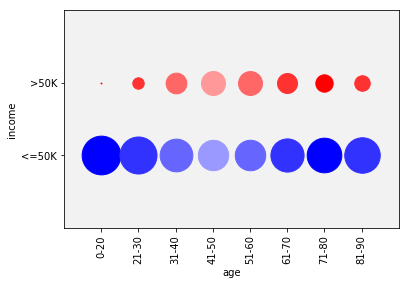

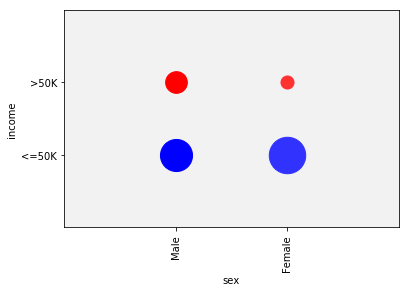

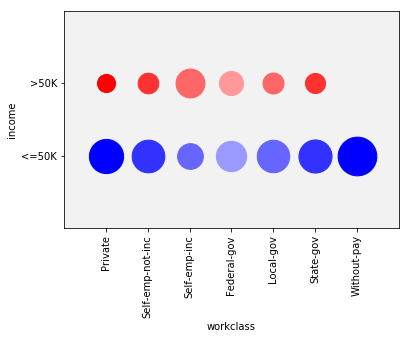

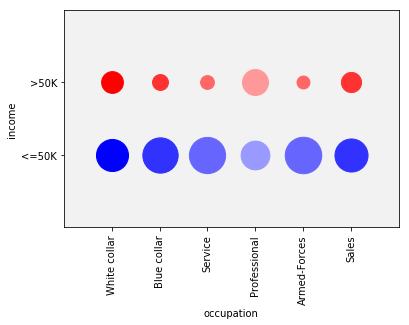

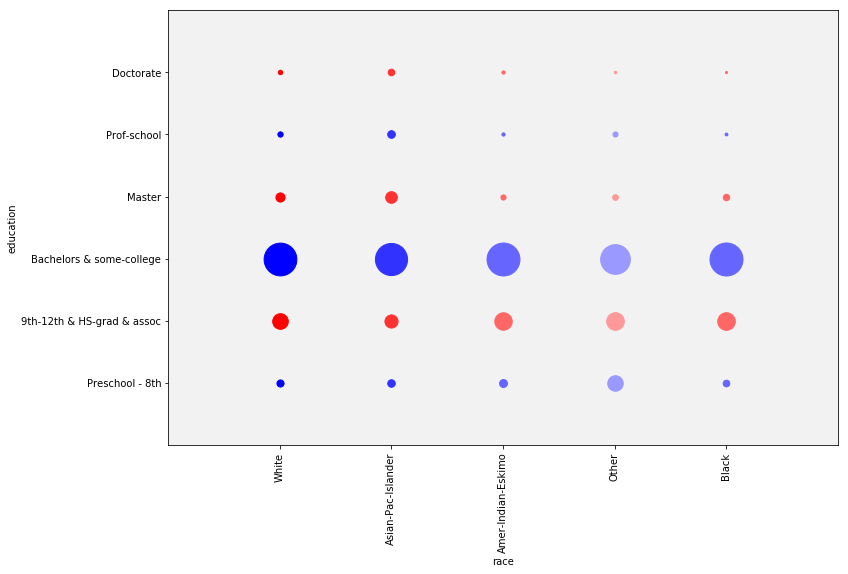

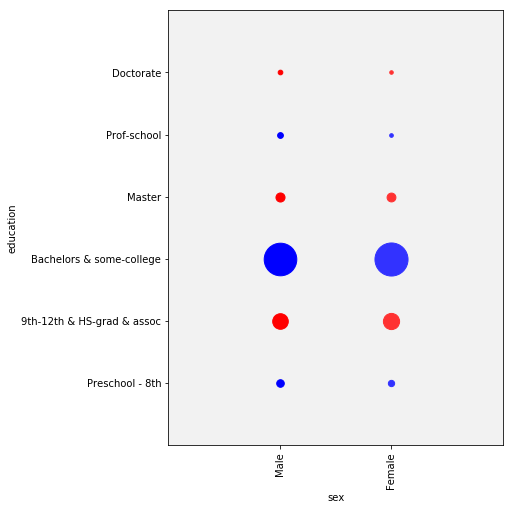

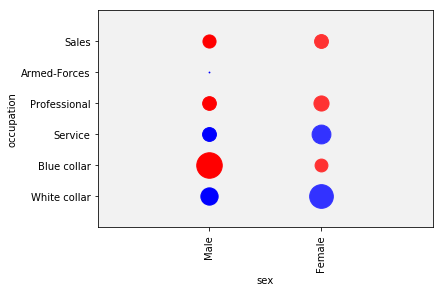

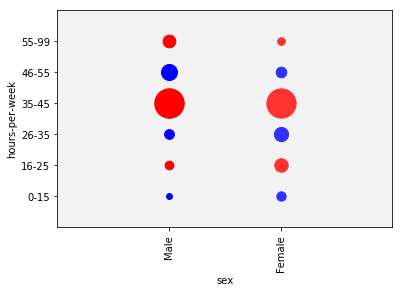

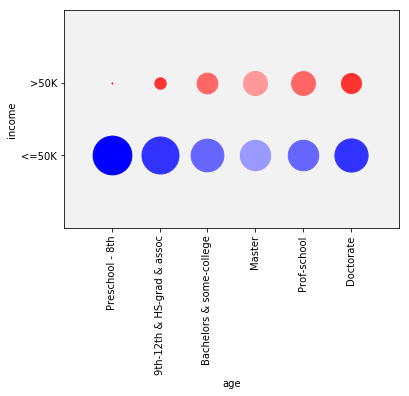

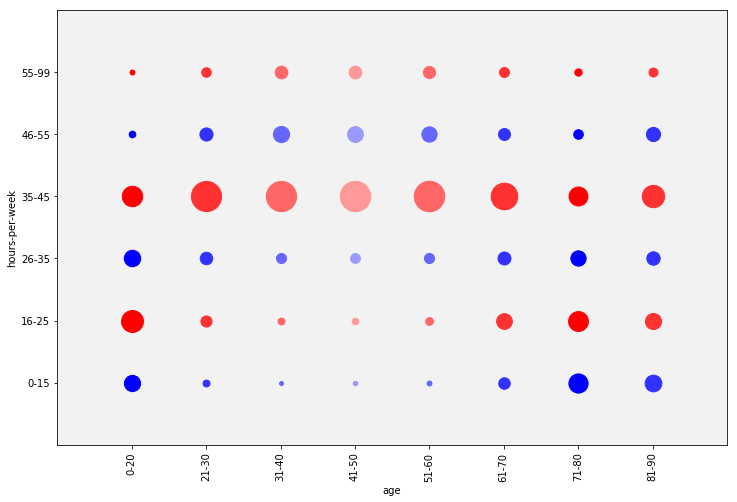

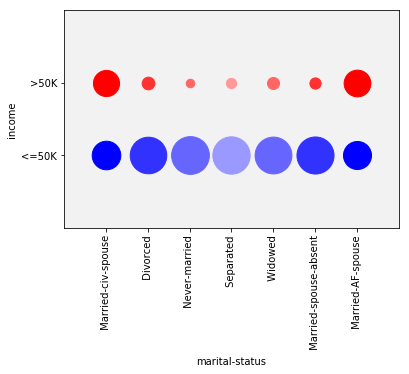

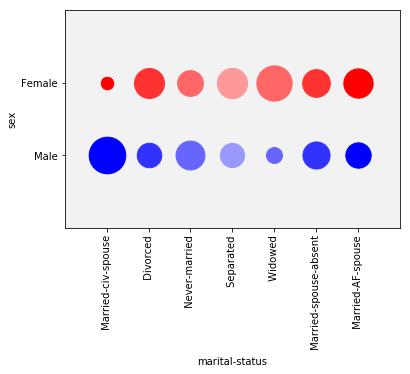

In [19]:

### Age vs Income
plotting(no_x=no_age,no_y=no_inc,xlabel='age',ylabel='income',
         x_ticks=["0-20","21-30","31-40","41-50","51-60","61-70","71-80","81-90"],
         y_ticks=["<=50K",">50K"],normalize=True,fy=None, fx=None)
### Sex vs Income
plotting(no_x=no_sex,no_y=no_inc,xlabel='sex',ylabel='income',
         x_ticks=["Male","Female"],
         y_ticks=["<=50K",">50K"],normalize=True,fy=None, fx=None)
### Workclass vs Income
plotting(no_x=no_work,no_y=no_inc,xlabel='workclass',ylabel='income',
         x_ticks=["Private", "Self-emp-not-inc", "Self-emp-inc", "Federal-gov", "Local-gov", "State-gov", "Without-pay", "Never-worked"],
         y_ticks=["<=50K",">50K"],normalize=True,fy=None, fx=None)
### Occupation vs Income
plotting(no_x=no_occ,no_y=no_inc,xlabel='occupation',ylabel='income',
         x_ticks=["White collar", "Blue collar", "Service", "Professional", "Armed-Forces", "Sales"],
         y_ticks=["<=50K",">50K"],normalize=True,fy=None, fx=None)
### Race vs Education
plotting(no_x=no_race,no_y=no_edu,xlabel='race',ylabel='education',
         x_ticks=["White", "Asian-Pac-Islander", "Amer-Indian-Eskimo", "Other", "Black"],
         y_ticks=["Preschool - 8th", "9th-12th & HS-grad & assoc", "Bachelors & some-college", "Master", "Prof-school", "Doctorate"],
         normalize=True,fy=12, fx=8)
### Sex vs Education
plotting(no_x=no_sex,no_y=no_edu,xlabel='sex',ylabel='education',
         x_ticks=["Male", "Female"],
         y_ticks=["Preschool - 8th", "9th-12th & HS-grad & assoc", "Bachelors & some-college", "Master", "Prof-school", "Doctorate"],
         normalize=True,
         fy=6, fx=8)

## Edges we added after testing

### Sex vs Occupation
plotting(no_x=no_sex,no_y=no_occ,xlabel='sex',ylabel='occupation',
         x_ticks=["Male","Female"],
         y_ticks=["White collar", "Blue collar", "Service", "Professional", "Armed-Forces", "Sales"],
         normalize=True,fy=None, fx=None)

### Sex vs HPW
plotting(no_x=no_sex,no_y=no_hpw,xlabel='sex',ylabel='hours-per-week',
         x_ticks=["Male","Female"],
         y_ticks=["0-15","16-25","26-35","35-45","46-55","55-99"],
         normalize=True,fy=None, fx=None)

### Education vs Income
plotting(no_x=no_edu,no_y=no_inc,xlabel='age',ylabel='income',
         x_ticks=["Preschool - 8th", "9th-12th & HS-grad & assoc", "Bachelors & some-college", "Master", "Prof-school", "Doctorate"],
         y_ticks=["<=50K",">50K"],normalize=True,fy=None, fx=None)

### Age vs Hours per week
plotting(no_x=no_age,no_y=no_hpw,xlabel='age',ylabel='hours-per-week',
         x_ticks=["0-20","21-30","31-40","41-50","51-60","61-70","71-80","81-90"],
         y_ticks=["0-15","16-25","26-35","35-45","46-55","55-99"],
         normalize=True,
         fy=12, fx=8)

### Education vs Income
plotting(no_x=no_mar,no_y=no_inc,xlabel='marital-status',ylabel='income',
         x_ticks=list(mar_dict),
         y_ticks=["<=50K",">50K"],normalize=True,fy=None, fx=None)

### Education vs Income
plotting(no_x=no_mar,no_y=no_sex,xlabel='marital-status',ylabel='sex',
         x_ticks=list(mar_dict),
         y_ticks=["Male","Female"],normalize=True,fy=None, fx=None)

plt.show()